In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/Y3.S1 MLOM/LSTM-Multivariate_pollution.csv").drop(columns=["date"])
print(df_train.shape)
df_train.head()

(43800, 8)


pollution  dew  temp   press wnd_dir  wnd_spd  snow  rain
0      129.0  -16  -4.0  1020.0      SE     1.79     0     0
1      148.0  -15  -4.0  1020.0      SE     2.68     0     0
2      159.0  -11  -5.0  1021.0      SE     3.57     0     0
3      181.0   -7  -5.0  1022.0      SE     5.36     1     0
4      138.0   -7  -5.0  1022.0      SE     6.25     2     0

In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/Y3.S1 MLOM/pollution_test_data1.csv")
print(df_test.shape)
df_test.head()

(346, 8)


dew  temp  press wnd_dir  wnd_spd  snow  rain  pollution
0  -16     4   1027      SE     3.58     0     0        128
1  -17     5   1027      SE     7.60     0     0         77
2  -16     4   1027      SE     9.39     0     0         65
3  -16     1   1028      cv     0.89     0     0         79
4  -14     0   1028      NE     1.79     0     0         93

In [ ]:
# Checking null values
print(df_train.isnull().sum() , "\n -------- \n" , df_test.isnull().sum() )

pollution    0
dew          0
temp         0
press        0
wnd_dir      0
wnd_spd      0
snow         0
rain         0
dtype: int64 
 -------- 
 dew          0
temp         0
press        0
wnd_dir      0
wnd_spd      0
snow         0
rain         0
pollution    0
dtype: int64


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot for each variable
fig = make_subplots(rows=4, cols=2, subplot_titles=('Pollution', 'Dew', 'Temperature', 'Pressure', 'Wind Direction', 'Wind Speed', 'Snow', 'Rain'))

# Define color palette
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880']

# Add a histogram for each variable
fig.add_trace(go.Histogram(x=df_train['pollution'], nbinsx=20, marker_color=colors[0]), row=1, col=1)
fig.add_trace(go.Histogram(x=df_train['dew'], nbinsx=20, marker_color=colors[1]), row=1, col=2)
fig.add_trace(go.Histogram(x=df_train['temp'], nbinsx=20, marker_color=colors[2]), row=2, col=1)
fig.add_trace(go.Histogram(x=df_train['press'], nbinsx=20, marker_color=colors[3]), row=2, col=2)
fig.add_trace(go.Histogram(x=df_train['wnd_dir'], nbinsx=20, marker_color=colors[4]), row=3, col=1)
fig.add_trace(go.Histogram(x=df_train['wnd_spd'], nbinsx=20, marker_color=colors[5]), row=3, col=2)
fig.add_trace(go.Histogram(x=df_train['snow'], nbinsx=20, marker_color=colors[6]), row=4, col=1)
fig.add_trace(go.Histogram(x=df_train['rain'], nbinsx=20, marker_color=colors[7]), row=4, col=2)

# Update layout
fig.update_layout(height=1000, width=1200, title_text='Distribution of Variables', showlegend=False)

# Customize axis labels and titles
fig.update_xaxes(title_text='Value', row=1, col=1)
fig.update_xaxes(title_text='Value', row=1, col=2)
fig.update_xaxes(title_text='Value', row=2, col=1)
fig.update_xaxes(title_text='Value', row=2, col=2)
fig.update_xaxes(title_text='Value', row=3, col=1)
fig.update_xaxes(title_text='Value', row=3, col=2)
fig.update_xaxes(title_text='Value', row=4, col=1)
fig.update_xaxes(title_text='Value', row=4, col=2)

fig.update_yaxes(title_text='Frequency', row=1, col=1)
fig.update_yaxes(title_text='Frequency', row=1, col=2)
fig.update_yaxes(title_text='Frequency', row=2, col=1)
fig.update_yaxes(title_text='Frequency', row=2, col=2)
fig.update_yaxes(title_text='Frequency', row=3, col=1)
fig.update_yaxes(title_text='Frequency', row=3, col=2)
fig.update_yaxes(title_text='Frequency', row=4, col=1)
fig.update_yaxes(title_text='Frequency', row=4, col=2)

# Customize subplot titles
fig.update_annotations(font_size=16)

# Show the plot
fig.show()

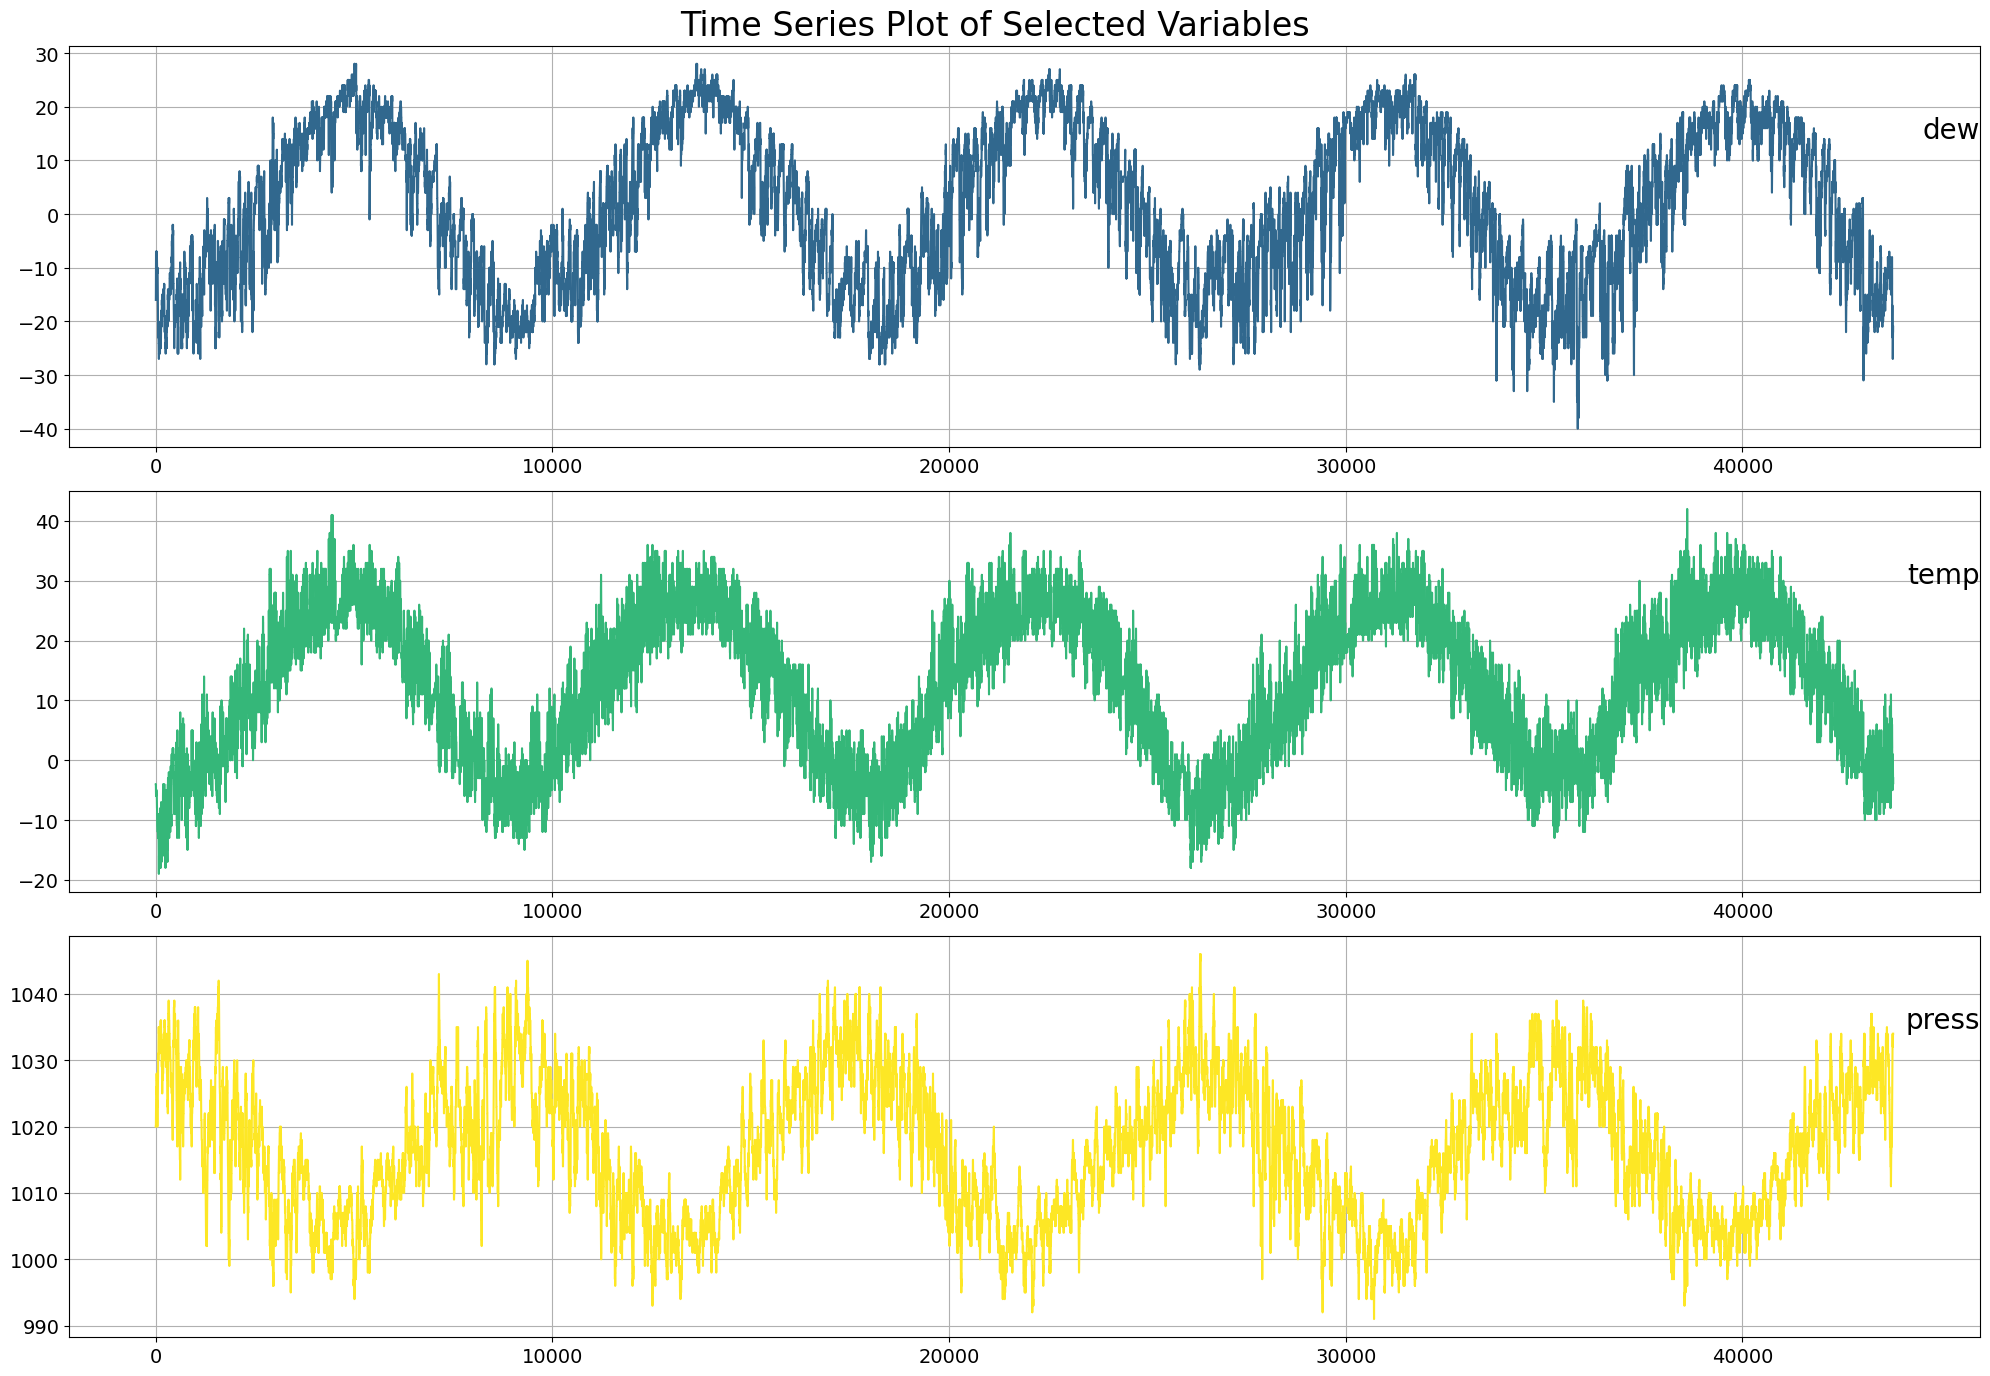

In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
values = df_train.values

# specify columns to plot
groups = [1, 2, 3]
i = 1

# plot each column
fig, axs = plt.subplots(len(groups), 1, figsize=(20, 14), facecolor='white')
for group, ax in zip(groups, axs):
    ax.plot(values[:, group], color=cm.viridis(group/len(groups)))
    ax.set_title(df_train.columns[group], y=0.75, loc='right', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.grid(True)
    i += 1

plt.suptitle('Time Series Plot of Selected Variables', fontsize=24)
plt.tight_layout()
plt.show()

In [ ]:
df_train_scaled = df_train.copy()
df_test_scaled = df_test.copy()

# Define the mapping dictionary
mapping = {'NE': 0, 'SE': 1, 'NW': 2, 'cv': 3}

# Replace the string values with numerical values
df_train_scaled['wnd_dir'] = df_train_scaled['wnd_dir'].map(mapping)
df_test_scaled['wnd_dir'] = df_test_scaled['wnd_dir'].map(mapping)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
scaler = MinMaxScaler()


# Define the columns to scale
columns = (['pollution', 'dew', 'temp', 'press', 'wnd_spd',
       'snow', 'rain' , "wnd_dir"])


# Scale the selected columns to the range 0-1
df_train_scaled[columns] = scaler.fit_transform(df_train_scaled[columns])
df_test_scaled[columns] = scaler.transform(df_test_scaled[columns])


# Show the scaled data
df_train_scaled.head()

pollution       dew      temp     press   wnd_dir   wnd_spd      snow  rain
0   0.129779  0.352941  0.245902  0.527273  0.333333  0.002290  0.000000   0.0
1   0.148893  0.367647  0.245902  0.527273  0.333333  0.003811  0.000000   0.0
2   0.159960  0.426471  0.229508  0.545455  0.333333  0.005332  0.000000   0.0
3   0.182093  0.485294  0.229508  0.563636  0.333333  0.008391  0.037037   0.0
4   0.138833  0.485294  0.229508  0.563636  0.333333  0.009912  0.074074   0.0

In [ ]:
# Define the window size
window_size = 10

#-------------------------TrainSet---------------------------------

# Initialize empty lists to store X and Y
X_sequences = []
Y_values = []

# Iterate through the DataFrame to create sequences
for i in range(len(df_train_scaled) - window_size):
    X_seq = df_train_scaled.iloc[i:i+window_size].values
    Y_val = df_train_scaled.iloc[i+window_size]['pollution']
    X_sequences.append(X_seq)
    Y_values.append(Y_val)

# Convert the lists to NumPy arrays for modeling
X_train = np.array(X_sequences)
y_train = np.array(Y_values)

#-------------------------TestSet---------------------------------

# Initialize empty lists to store X and Y
X_sequences = []
Y_values = []

# Iterate through the DataFrame to create sequences
for i in range(len(df_test_scaled) - window_size):
    X_seq = df_test_scaled.iloc[i:i+window_size].values
    Y_val = df_test_scaled.iloc[i+window_size]['pollution']
    X_sequences.append(X_seq)
    Y_values.append(Y_val)

# Convert the lists to NumPy arrays for modeling
X_test = np.array(X_sequences)
y_test = np.array(Y_values)

#-----------------------------------------------------------------
print("Train size : " , X_train.shape , y_train.shape,"\n ------- \n"
      "Test Size : ",X_test.shape , y_test.shape)

Train size :  (43790, 10, 8) (43790,) 
 ------- 
Test Size :  (336, 10, 8) (336,)


In [ ]:
import torch
import torch.nn as nn

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1,1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1,1))

In [ ]:
# Define LSTM Model

class LSTM(nn.Module):
    def __init__(self , input_size , hidden_size , num_layers , output_size):
        super(LSTM , self).__init__()
        self.input = input_size
        self.output = output_size
        self.H = hidden_size
        self.L = num_layers

        self.LSTM = nn.LSTM(input_size = self.input , hidden_size  = self.H ,
                            num_layers = self.L , batch_first = True)

        self.fc   = nn.Linear(self.H , self.output)

    def forward(self , x):
        # Initialize hidden states for each layer and batch
        h0 = torch.zeros(self.L , x.size(0) , self.H ).to(device)
        c0 = torch.zeros(self.L , x.size(0) , self.H ).to(device)

        # Forward Pass
        out , _ = self.LSTM(x , (h0,c0))

        out = self.fc(out[:, -1, :])

        return out

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

device

device(type='cpu')

In [ ]:
num_layer = 16
hidden_size = 32
input_size = 10
output_size = 1

model = LSTM(input_size = input_size , hidden_size= hidden_size,
 num_layers = num_layer, output_size = output_size).to(device)


optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

print(model)

LSTM(
  (LSTM): LSTM(10, 32, num_layers=16, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)


In [ ]:
from torch.utils.data import TensorDataset, DataLoader

# Define batch size
batch_size = 128

# Define data loaders for training and testing data in batches
train_data = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, drop_last=True)

test_data = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True, drop_last=True)

In [ ]:
num_epochs = 10

train_losses = []  # To store train losses
test_losses = []   # To store test losses

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    train_loss = 0.0

    for i, (inputs, targets) in enumerate(train_loader):
        # Forward pass
        inputs = inputs.reshape(-1, 8, 10).to(device)
        targets = targets.reshape(-1, 1).to(device)

        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward and optimize
        loss.backward()
        optimizer.step()

        # Accumulate train loss
        train_loss += loss.item()

    # Calculate and store the average train loss for this epoch
    avg_train_loss = train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {avg_train_loss:.4f}")

    # Validation (testing) after each epoch
    model.eval()  # Set the model to evaluation mode
    test_loss = 0.0

    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs = inputs.reshape(-1, 8, 10).to(device)
            targets = targets.reshape(-1, 1).to(device)

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            # Accumulate test loss
            test_loss += loss.item()

    # Calculate and store the average test loss for this epoch
    avg_test_loss = test_loss / len(test_loader)
    test_losses.append(avg_test_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}] - Test Loss: {avg_test_loss:.4f}")

Epoch [1/10] - Train Loss: 0.0087
Epoch [1/10] - Test Loss: 0.0100
Epoch [2/10] - Train Loss: 0.0086
Epoch [2/10] - Test Loss: 0.0100
Epoch [3/10] - Train Loss: 0.0086
Epoch [3/10] - Test Loss: 0.0097
Epoch [4/10] - Train Loss: 0.0087
Epoch [4/10] - Test Loss: 0.0095
Epoch [5/10] - Train Loss: 0.0086
Epoch [5/10] - Test Loss: 0.0100
Epoch [6/10] - Train Loss: 0.0087
Epoch [6/10] - Test Loss: 0.0099
Epoch [7/10] - Train Loss: 0.0087
Epoch [7/10] - Test Loss: 0.0090
Epoch [8/10] - Train Loss: 0.0086
Epoch [8/10] - Test Loss: 0.0099
Epoch [9/10] - Train Loss: 0.0087
Epoch [9/10] - Test Loss: 0.0105
Epoch [10/10] - Train Loss: 0.0086
Epoch [10/10] - Test Loss: 0.0101


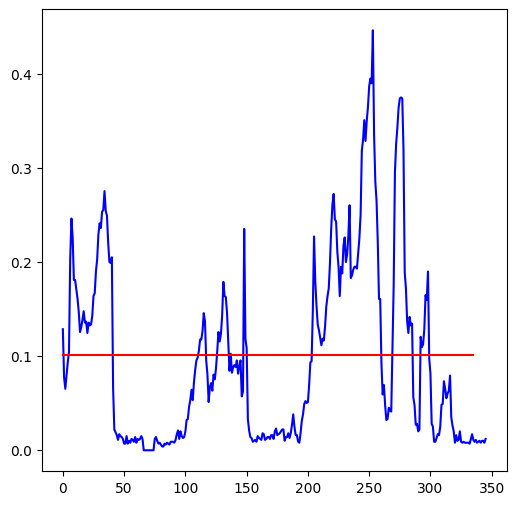

In [ ]:
with torch.no_grad():
    predicted_values = model(X_test.reshape(-1, 8, 10).to(device)).cpu().numpy()

# Create a scatter plot of true values vs. predicted values
plt.figure(figsize=(6, 6))
plt.plot(df_test_scaled["pollution"]  , label='True Values',color='blue')
plt.plot(predicted_values , label='Predicted Values', color='red')

try 2

In [ ]:
# Mount your Google Drive to access data files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.cm as cm

In [ ]:
# Load the training dataset
df_train = pd.read_csv("/content/drive/MyDrive/Y3.S1 MLOM/LSTM-Multivariate_pollution.csv").drop(columns=["date"])
print(df_train.shape)
df_train.head()

# Load the test dataset
df_test = pd.read_csv("/content/drive/MyDrive/Y3.S1 MLOM/pollution_test_data1.csv")
print(df_test.shape)
df_test.head()

(43800, 8)
(346, 8)


dew  temp  press wnd_dir  wnd_spd  snow  rain  pollution
0  -16     4   1027      SE     3.58     0     0        128
1  -17     5   1027      SE     7.60     0     0         77
2  -16     4   1027      SE     9.39     0     0         65
3  -16     1   1028      cv     0.89     0     0         79
4  -14     0   1028      NE     1.79     0     0         93

In [ ]:
# Check for missing values in the datasets
print(df_train.isnull().sum(), "\n -------- \n", df_test.isnull().sum())#---> no null vales

pollution    0
dew          0
temp         0
press        0
wnd_dir      0
wnd_spd      0
snow         0
rain         0
dtype: int64 
 -------- 
 dew          0
temp         0
press        0
wnd_dir      0
wnd_spd      0
snow         0
rain         0
pollution    0
dtype: int64


In [ ]:
# Handle missing values
# Replace missing values with the mean of the column
#df_train.fillna(df_train.mean(), inplace=True)
#df_test.fillna(df_test.mean(), inplace=True)
#print("Missing values handled.")

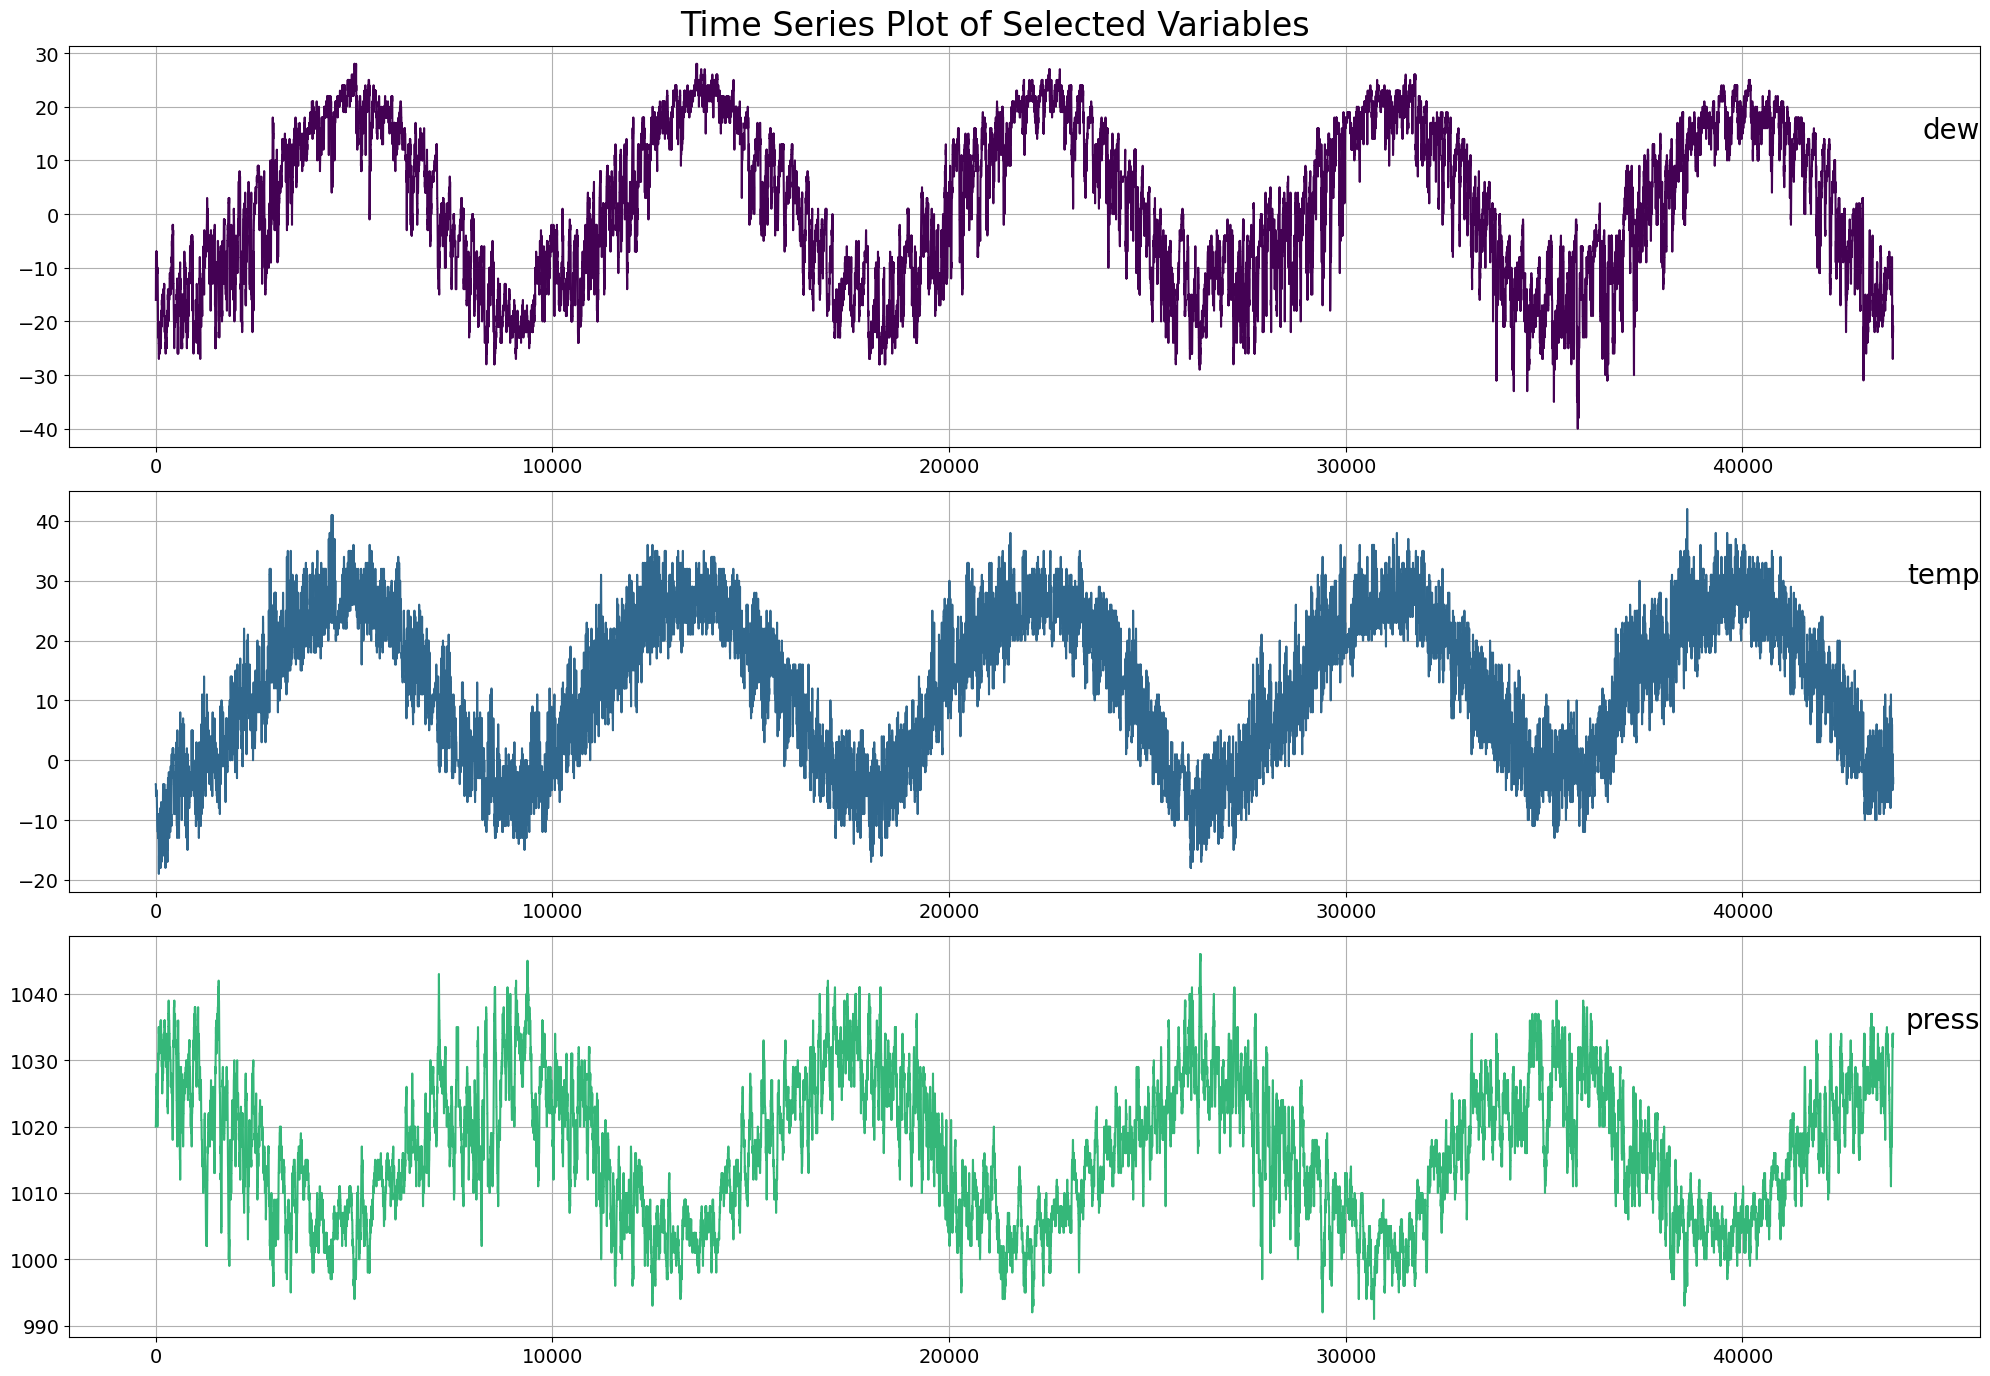

In [ ]:
# Create subplots for variable distribution
fig_dist = make_subplots(rows=4, cols=2, subplot_titles=('Pollution', 'Dew', 'Temperature', 'Pressure', 'Wind Direction', 'Wind Speed', 'Snow', 'Rain'))
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880']

# Add histograms for each variable
for i, column in enumerate(df_train.columns):
    fig_dist.add_trace(go.Histogram(x=df_train[column], nbinsx=20, marker_color=colors[i]), row=(i // 2) + 1, col=(i % 2) + 1)

fig_dist.update_layout(height=1000, width=1200, title_text='Distribution of Variables', showlegend=False)

# Show the distribution plot
fig_dist.show()

# Create time series plots for selected variables
selected_columns = ['dew', 'temp', 'press']
fig_time_series, axs = plt.subplots(len(selected_columns), 1, figsize=(20, 14), facecolor='white')


for i, column in enumerate(selected_columns):
    axs[i].plot(df_train[column], color=cm.viridis(i / len(selected_columns)))
    axs[i].set_title(column, y=0.75, loc='right', fontsize=20)
    axs[i].tick_params(axis='both', which='major', labelsize=14)
    axs[i].grid(True)

plt.suptitle('Time Series Plot of Selected Variables', fontsize=24)
plt.tight_layout()
plt.show()

or this

In [ ]:
# Create subplots for variable distribution
fig = make_subplots(rows=4, cols=2, subplot_titles=('Pollution', 'Dew', 'Temperature', 'Pressure', 'Wind Direction', 'Wind Speed', 'Snow', 'Rain'))

# Define color palette
colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880']

# Add a histogram for each variable
fig.add_trace(go.Histogram(x=df_train['pollution'], nbinsx=20, marker_color=colors[0]), row=1, col=1)
fig.add_trace(go.Histogram(x=df_train['dew'], nbinsx=20, marker_color=colors[1]), row=1, col=2)
fig.add_trace(go.Histogram(x=df_train['temp'], nbinsx=20, marker_color=colors[2]), row=2, col=1)
fig.add_trace(go.Histogram(x=df_train['press'], nbinsx=20, marker_color=colors[3]), row=2, col=2)
fig.add_trace(go.Histogram(x=df_train['wnd_dir'], nbinsx=20, marker_color=colors[4]), row=3, col=1)
fig.add_trace(go.Histogram(x=df_train['wnd_spd'], nbinsx=20, marker_color=colors[5]), row=3, col=2)
fig.add_trace(go.Histogram(x=df_train['snow'], nbinsx=20, marker_color=colors[6]), row=4, col=1)
fig.add_trace(go.Histogram(x=df_train['rain'], nbinsx=20, marker_color=colors[7]), row=4, col=2)

# Update layout
fig.update_layout(height=1000, width=1200, title_text='Distribution of Variables', showlegend=False)

# Customize axis labels and titles
fig.update_xaxes(title_text='Value', row=1, col=1)
fig.update_xaxes(title_text='Value', row=1, col=2)
fig.update_xaxes(title_text='Value', row=2, col=1)
fig.update_xaxes(title_text='Value', row=2, col=2)
fig.update_xaxes(title_text='Value', row=3, col=1)
fig.update_xaxes(title_text='Value', row=3, col=2)
fig.update_xaxes(title_text='Value', row=4, col=1)
fig.update_xaxes(title_text='Value', row=4, col=2)

fig.update_yaxes(title_text='Frequency', row=1, col=1)
fig.update_yaxes(title_text='Frequency', row=1, col=2)
fig.update_yaxes(title_text='Frequency', row=2, col=1)
fig.update_yaxes(title_text='Frequency', row=2, col=2)
fig.update_yaxes(title_text='Frequency', row=3, col=1)
fig.update_yaxes(title_text='Frequency', row=3, col=2)
fig.update_yaxes(title_text='Frequency', row=4, col=1)

# Customize subplot titles
fig.update_annotations(font_size=16)

# Show the plot
fig.show()

# Specify columns to plot in the time series
values = df_train.values
groups = [1, 2, 3]

# Plot each column
fig, axs = plt.subplots(len(groups), 1, figsize=(20, 14), facecolor='white')
for group, ax in zip(groups, axs):
    ax.plot(values[:, group], color=cm.viridis(group/len(groups)))
    ax.set_title(df_train.columns[group], y=0.75, loc='right', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.grid(True)

plt.suptitle('Time Series Plot of Selected Variables', fontsize=24)
plt.tight_layout()
plt.show()

In [ ]:
# Create scaled versions of the training and test data
df_train_scaled = df_train.copy()
df_test_scaled = df_test.copy()

# Mapping dictionary to convert wind direction strings to numerical values
mapping = {'NE': 0, 'SE': 1, 'NW': 2, 'cv': 3}

# Replace wind direction string values with numerical values
df_train_scaled['wnd_dir'] = df_train_scaled['wnd_dir'].map(mapping)
df_test_scaled['wnd_dir'] = df_test_scaled['wnd_dir'].map(mapping)

# Import MinMaxScaler from scikit-learn
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
scaler = MinMaxScaler()

# Define columns to scale
columns = (['pollution', 'dew', 'temp', 'press', 'wnd_spd', 'snow', 'rain', "wnd_dir"])

# Scale the selected columns to the range 0-1
df_train_scaled[columns] = scaler.fit_transform(df_train_scaled[columns])
df_test_scaled[columns] = scaler.transform(df_test_scaled[columns])

# Display the scaled data
df_train_scaled.head()

pollution       dew      temp     press   wnd_dir   wnd_spd      snow  rain
0   0.129779  0.352941  0.245902  0.527273  0.333333  0.002290  0.000000   0.0
1   0.148893  0.367647  0.245902  0.527273  0.333333  0.003811  0.000000   0.0
2   0.159960  0.426471  0.229508  0.545455  0.333333  0.005332  0.000000   0.0
3   0.182093  0.485294  0.229508  0.563636  0.333333  0.008391  0.037037   0.0
4   0.138833  0.485294  0.229508  0.563636  0.333333  0.009912  0.074074   0.0

In [ ]:
# Define the window size for creating sequences
window_size = 10

# Initialize empty lists to store input sequences and target values for training
X_sequences = []
Y_values = []

# Create sequences for training data
for i in range(len(df_train_scaled) - window_size):
    X_seq = df_train_scaled.iloc[i:i + window_size].values
    Y_val = df_train_scaled.iloc[i + window_size]['pollution']
    X_sequences.append(X_seq)
    Y_values.append(Y_val)

# Convert the lists to NumPy arrays
X_train = np.array(X_sequences)
y_train = np.array(Y_values)

In [ ]:
# Initialize empty lists to store input sequences and target values for testing
X_sequences = []
Y_values = []

# Create sequences for testing data
for i in range(len(df_test_scaled) - window_size):
    X_seq = df_test_scaled.iloc[i:i + window_size].values
    Y_val = df_test_scaled.iloc[i + window_size]['pollution']
    X_sequences.append(X_seq)
    Y_values.append(Y_val)

# Convert the lists to NumPy arrays for testing
X_test = np.array(X_sequences)
y_test = np.array(Y_values)


In [ ]:
# Print the shapes of the training and testing data
print("Train size: ", X_train.shape, y_train.shape, "\n ------- \nTest Size: ", X_test.shape, y_test.shape)

Train size:  (43790, 10, 8) (43790,) 
 ------- 
Test Size:  (336, 10, 8) (336,)


In [ ]:
# Convert NumPy arrays to PyTorch tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

In [ ]:
# Define the LSTM model
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTM, self).__init__()
        self.input = input_size
        self.output = output_size
        self.H = hidden_size
        self.L = num_layers
        self.LSTM = nn.LSTM(input_size=self.input, hidden_size=self.H, num_layers=self.L, batch_first=True)
        self.fc = nn.Linear(self.H, self.output)

    def forward(self, x):
        # Initialize hidden states for each layer and batch
        h0 = torch.zeros(self.L, x.size(0), self.H).to(device)
        c0 = torch.zeros(self.L, x.size(0), self.H).to(device)

        # Forward Pass
        out, _ = self.LSTM(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

In [ ]:
# Check if a GPU (CUDA) is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define hyperparameters for the LSTM model
num_layer = 16
hidden_size = 32
input_size = 10
output_size = 1

# Create an instance of the LSTM model and move it to the GPU if available
model = LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layer, output_size=output_size).to(device)

# Define the optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

# Print the model structure
print(model)

# Define the batch size
batch_size = 128

# Create data loaders for training and testing data
train_data = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, drop_last=True)

test_data = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True, drop_last=True)

# Define the number of epochs for training
num_epochs = 10

# Lists to store training and testing losses
train_losses = []
test_losses = []

In [ ]:
# Training the model
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    train_loss = 0.0

    for i, (inputs, targets) in enumerate(train_loader):
        # Forward pass
        inputs = inputs.reshape(-1, 8, 10).to(device)
        targets = targets.reshape(-1, 1).to(device)

        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward and optimize
        loss.backward()
        optimizer.step()

        # Accumulate train loss
        train_loss += loss.item()

    # Calculate and store the average train loss for this epoch
    avg_train_loss = train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    print(f"Epoch [{epoch + 1}/{num_epochs}] - Train Loss: {avg_train_loss:.4f}")

    model.eval()  # Set the model to evaluation mode for testing
    test_loss = 0.0

    with torch.no_grad():
        for inputs, targets in test_loader:
            inputs = inputs.reshape(-1, 8, 10).to(device)
            targets = targets.reshape(-1, 1).to(device)

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, targets)

            # Accumulate test loss
            test_loss += loss.item()

    # Calculate and store the average test loss for this epoch
    avg_test_loss = test_loss / len(test_loader)
    test_losses.append(avg_test_loss)

    print(f"Epoch [{epoch + 1}/{num_epochs}] - Test Loss: {avg_test_loss:.4f}")

LSTM(
  (LSTM): LSTM(10, 32, num_layers=16, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)
Epoch [1/10] - Train Loss: 0.0088
Epoch [1/10] - Test Loss: 0.0092
Epoch [2/10] - Train Loss: 0.0087
Epoch [2/10] - Test Loss: 0.0101
Epoch [3/10] - Train Loss: 0.0087
Epoch [3/10] - Test Loss: 0.0099
Epoch [4/10] - Train Loss: 0.0087
Epoch [4/10] - Test Loss: 0.0095
Epoch [5/10] - Train Loss: 0.0086
Epoch [5/10] - Test Loss: 0.0107
Epoch [6/10] - Train Loss: 0.0086
Epoch [6/10] - Test Loss: 0.0100
Epoch [7/10] - Train Loss: 0.0087
Epoch [7/10] - Test Loss: 0.0099
Epoch [8/10] - Train Loss: 0.0086
Epoch [8/10] - Test Loss: 0.0105
Epoch [9/10] - Train Loss: 0.0087
Epoch [9/10] - Test Loss: 0.0098
Epoch [10/10] - Train Loss: 0.0087
Epoch [10/10] - Test Loss: 0.0107


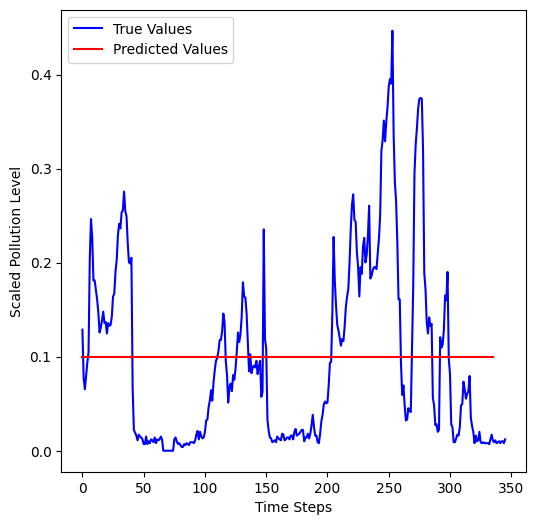

In [ ]:
# Get predicted values on the test data
with torch.no_grad():
    predicted_values = model(X_test.reshape(-1, 8, 10).to(device)).cpu().numpy()

# Create a scatter plot of true values vs. predicted values
plt.figure(figsize=(6, 6))
plt.plot(df_test_scaled["pollution"], label='True Values', color='blue')
plt.plot(predicted_values, label='Predicted Values', color='red')

# Add labels and legend
plt.xlabel('Time Steps')
plt.ylabel('Scaled Pollution Level')
plt.legend()

# Show the plot
plt.show()